[52, 51, 50, 56, 46, 44, 55, 51, 53, 54, 56, 50, 49, 58, 52, 55, 47, 46, 52, 58, 57, 56, 54, 52, 59, 58, 61, 53, 53, 48, 46, 49, 50, 53, 49, 47, 49, 49, 46, 59, 65, 66, 63, 62, 78, 70, 67, 69, 65, 63, 56, 51, 36, 25, 27, 35, 48, 52, 45, 57, 48, 52, 55, 60, 73, 76, 85, 83, 81, 81, 75, 70, 71, 68, 68, 69, 72, 69, 62, 66, 66, 68, 64, 62, 59, 60, 62]


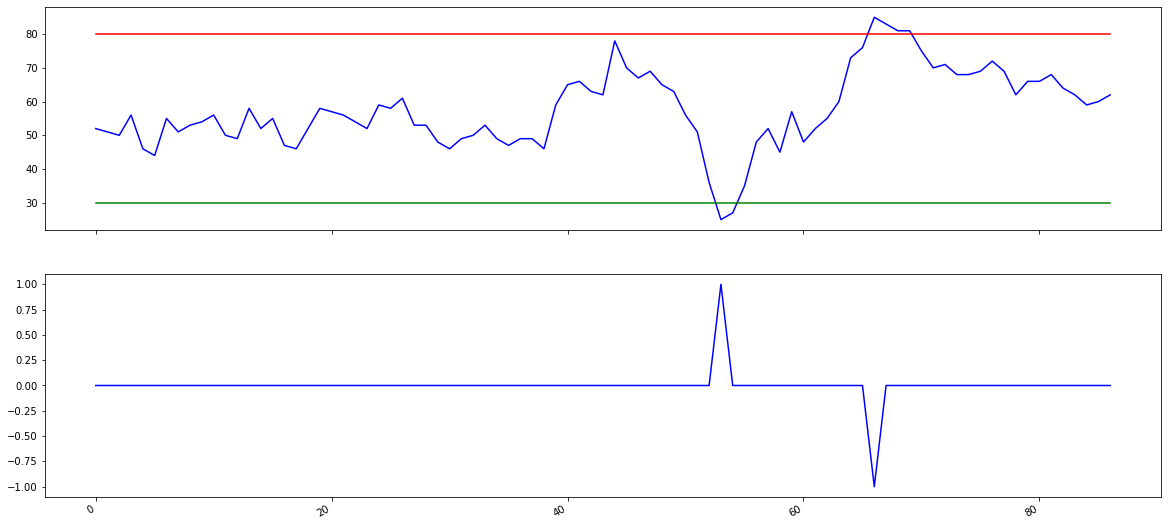

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from datetime import datetime

stocks = pd.read_csv('0050_new.csv')


stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks = stocks.tail(100)

x = len(stocks['Date'])



stocks_close = [float(line) for line in stocks['Close']]

delta = [np.nan]
up = []
down = []
rsi = []

go_buy =[]


for i in range(1, x):
    delta.append(round(stocks_close[i] - stocks_close[i-1], 2))


for key in delta:
    up.append(key if key > 0 else 0)
    down.append(key if key < 0 else 0)
    

for i in range(13, x):
    up_avg = sum(up[i-13:i+1])/14
    down_avg = abs(sum(down[i-13:i+1])/14)
    rsi.append(round(100*up_avg/(up_avg + down_avg)))

print(rsi)
flag = 1
    
for i in rsi:
    if (i > 80 and flag == 0):
        go_buy.append(-1)
        flag = 1
    elif i < 30 and flag == 1:
        go_buy.append(1)
        flag = 0
    else: 
        go_buy.append(0)
s = len(rsi)

    
rsi_sell = [30]*s
rsi_buy = [80]*s    

plt.figure(figsize = (20, 10))

fig = plt.figure(1) 
ax1 = fig.add_subplot(211)

ax1.plot(rsi, color = 'blue')
ax1.plot(rsi_sell, color = 'green')
ax1.plot(rsi_buy, color = 'red')

ax2 = fig.add_subplot(212)
    
ax2.plot(go_buy, color = 'blue')

plt.gcf().autofmt_xdate()
plt.show()